# June 19 - ConvaeNet Analysis

In [11]:
# Imports
import math
import os
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils
import random

# Label dict - Dictionary mapping integer labels to str
label_dict = {0:"gamma", 1:"e", 2:"mu"}

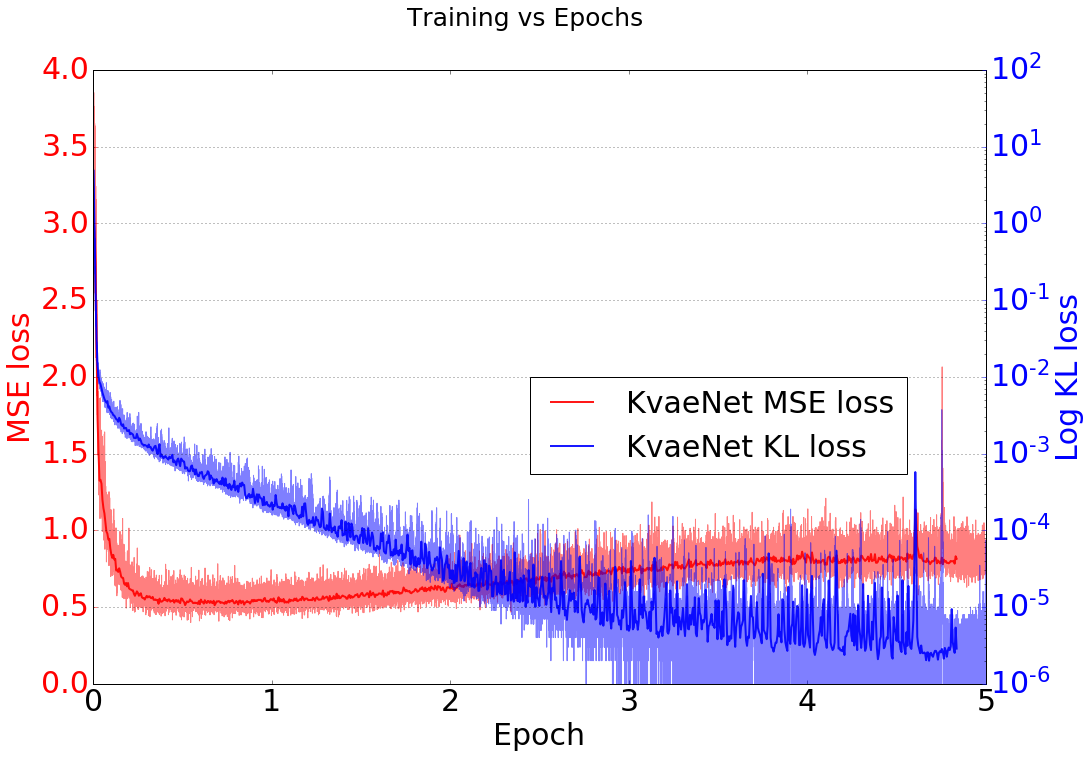

In [19]:
# Using the absolute path
run_id = "20190620_183351"
model_name = "KvaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)

## Display the actual and reconstructed events

## 5 epochs = 27999 iterations

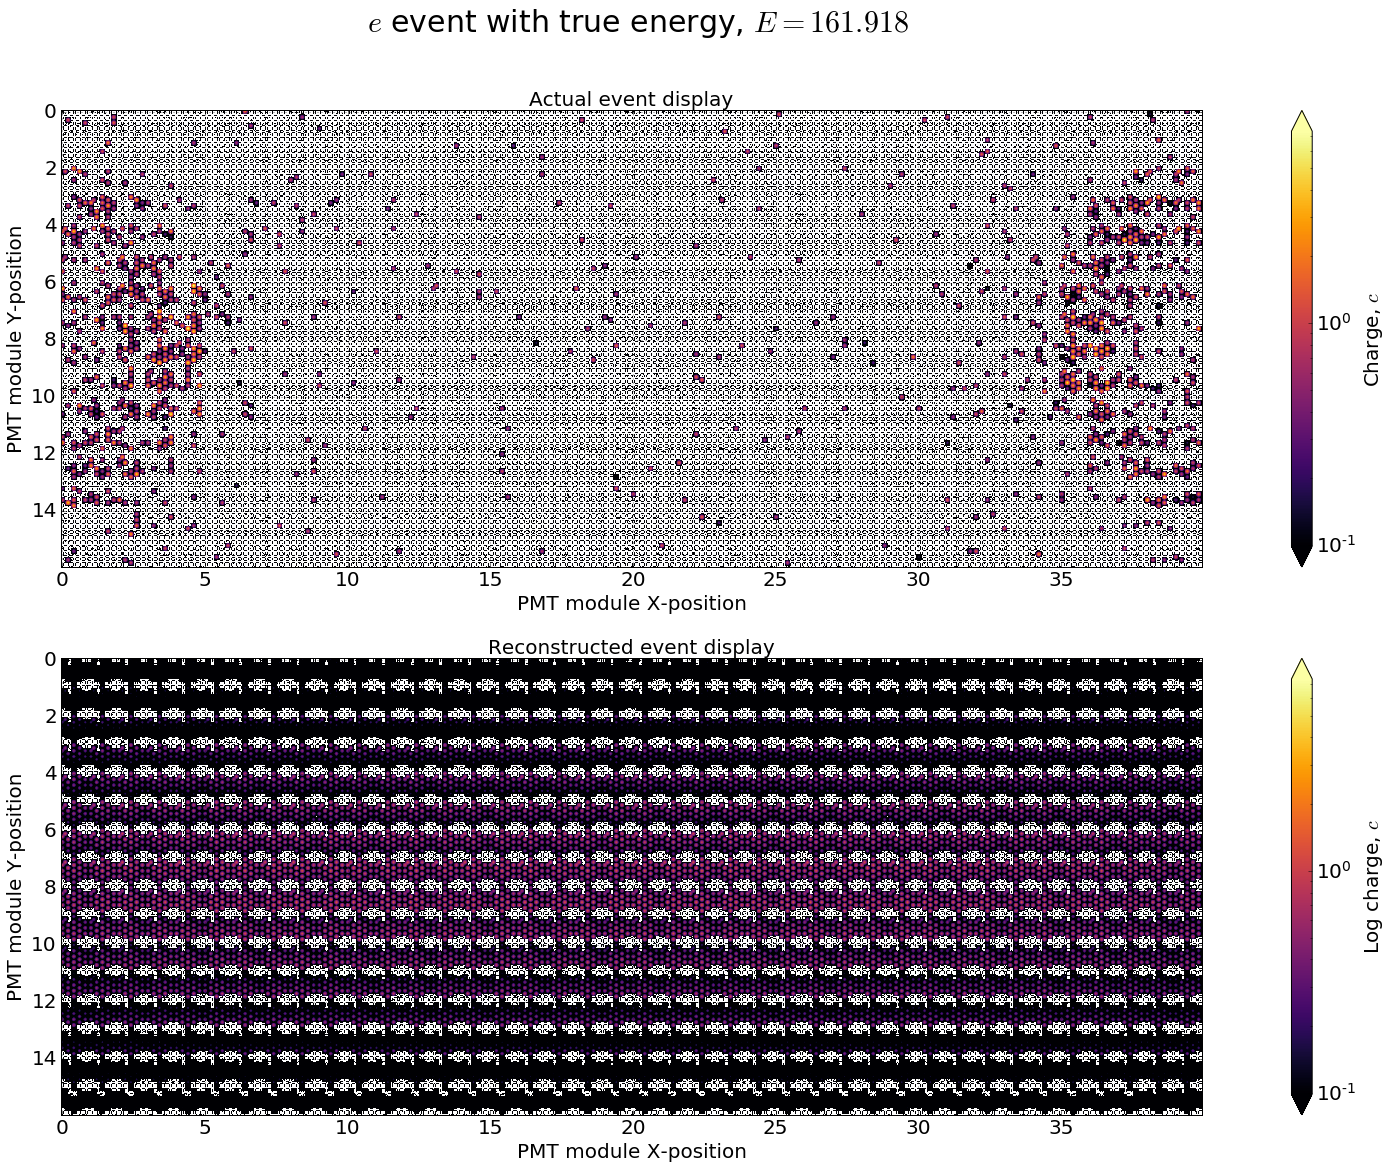

In [17]:
np_arr_path = dump_dir + "iteration_9999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

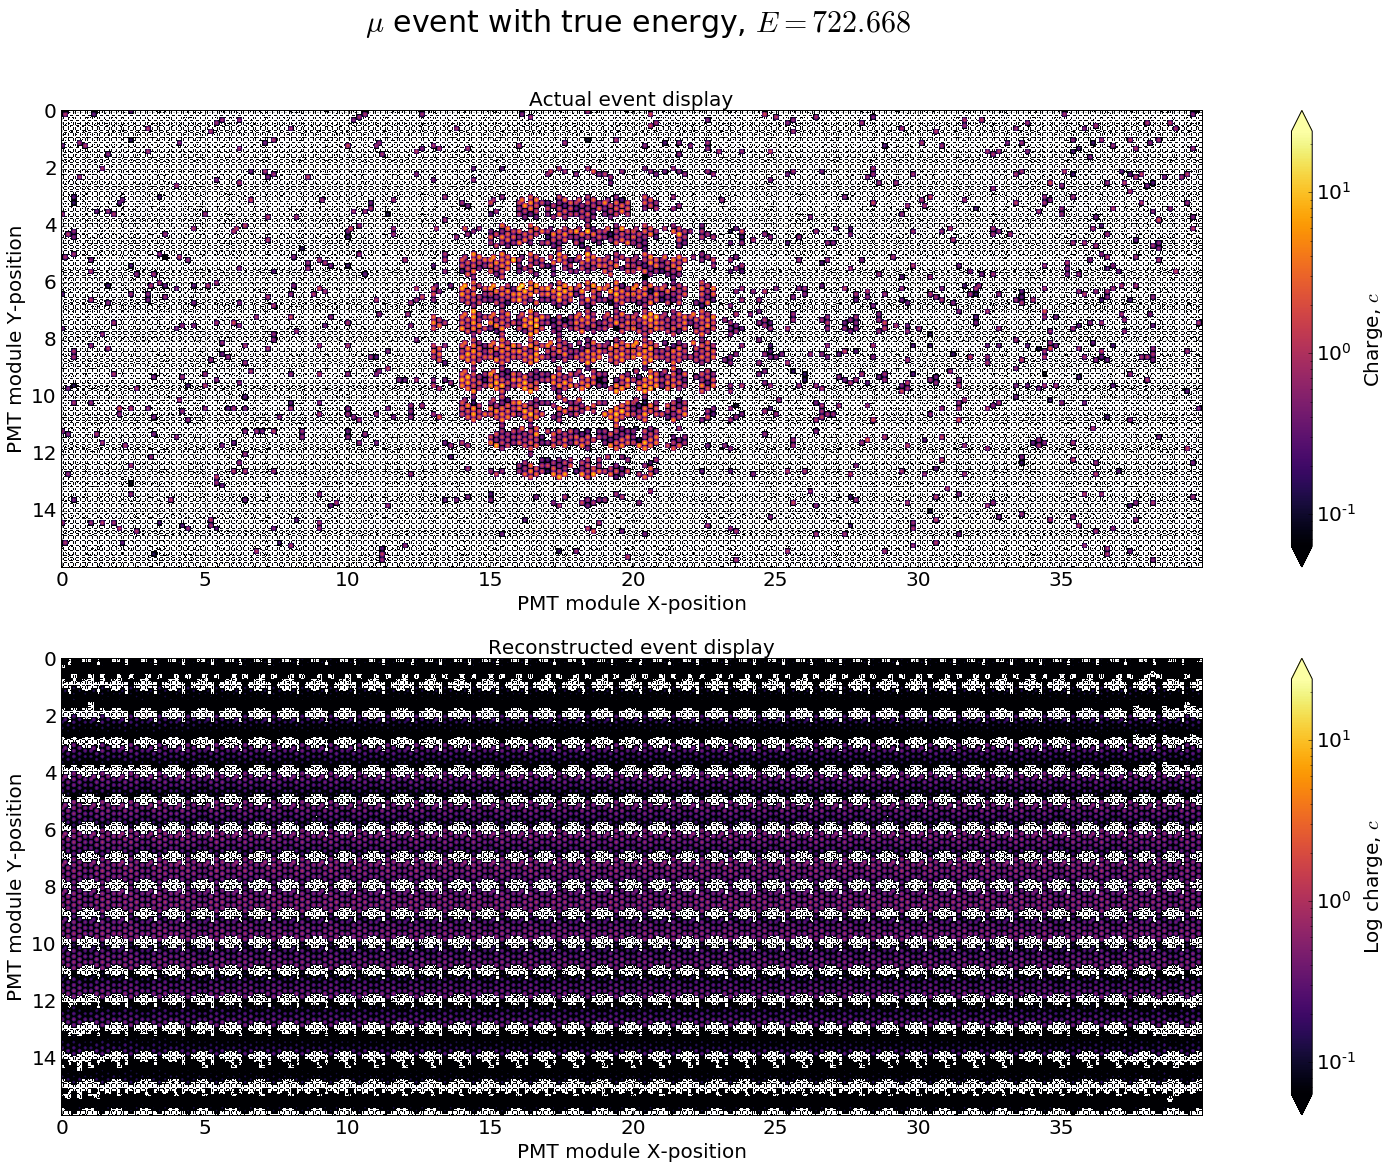

In [8]:
np_arr_path = dump_dir + "iteration_1999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

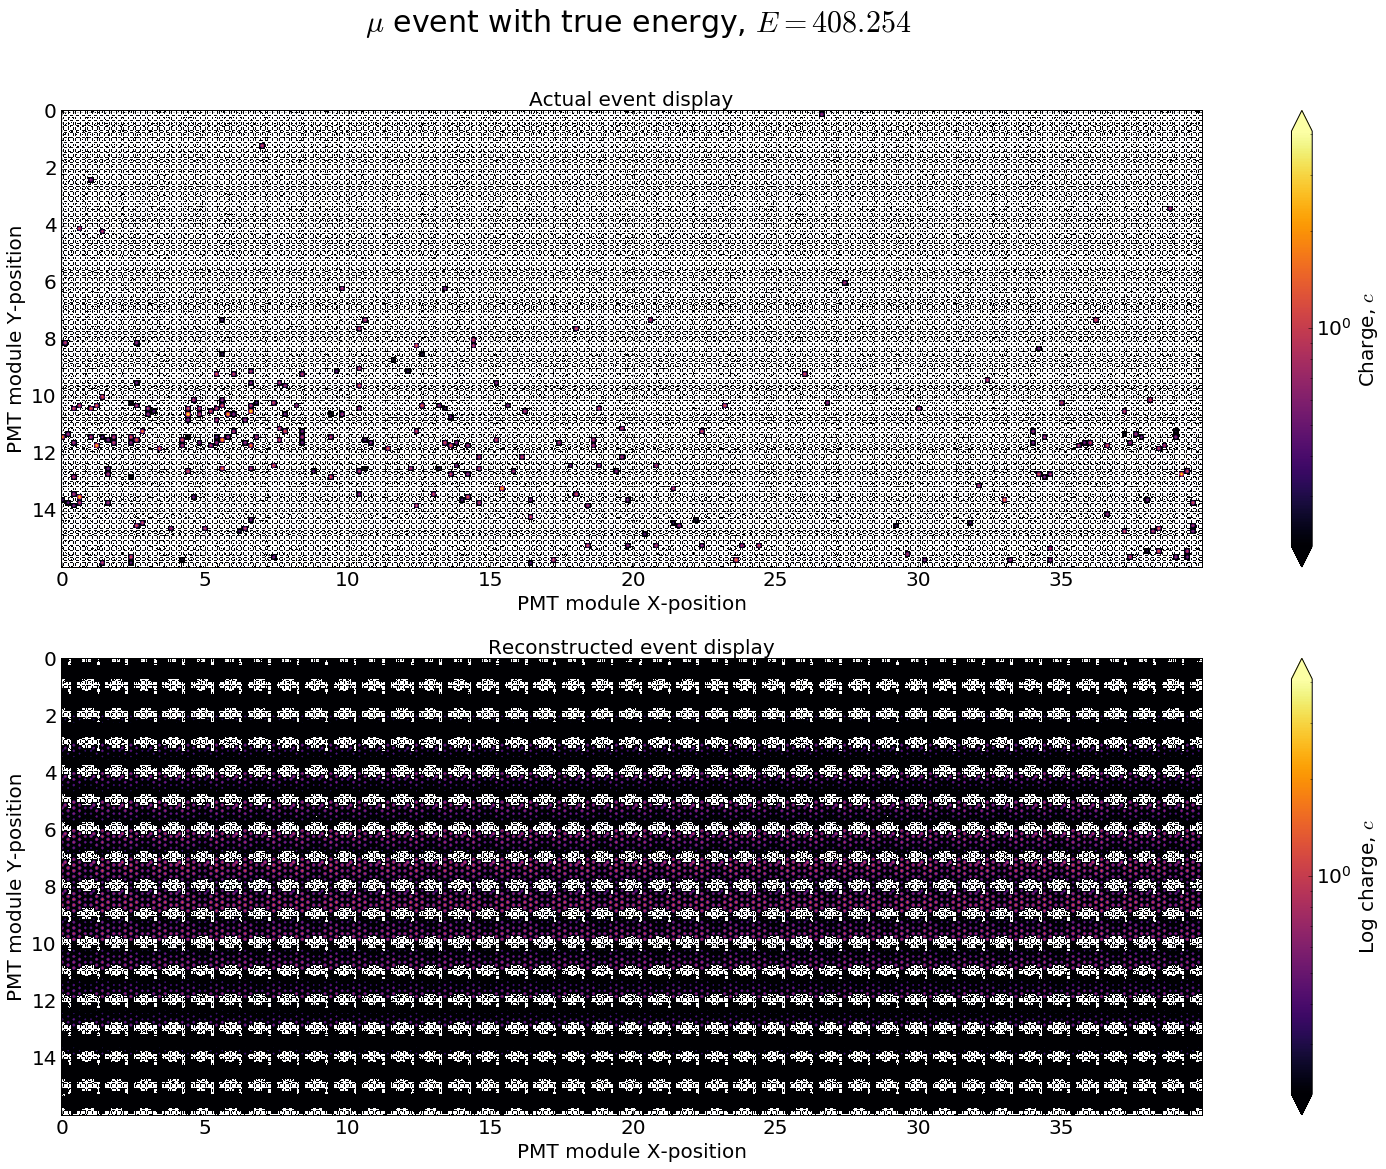

In [10]:
np_arr_path = dump_dir + "iteration_12999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

## The ConvaeNet did not learn anything at all. How about the test using 50000 samples ?

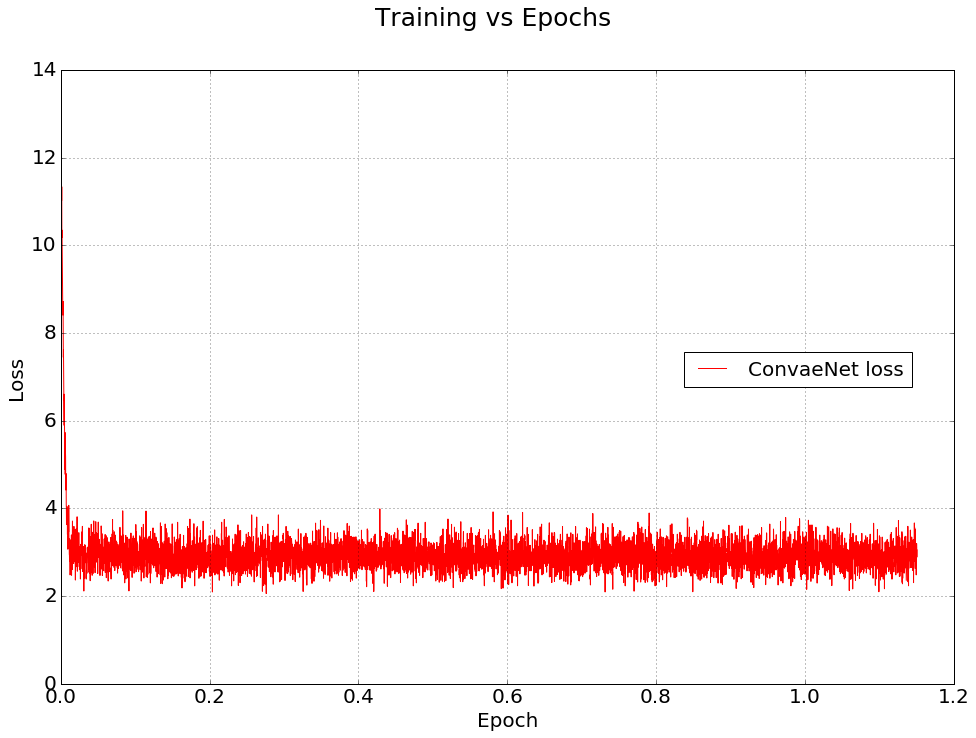

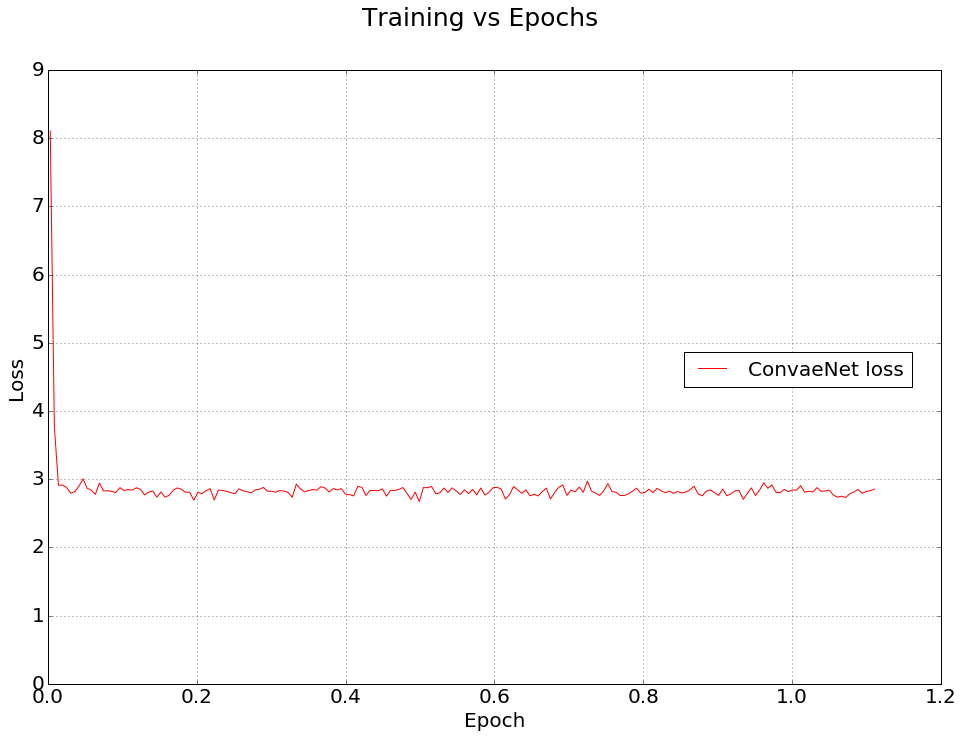

In [7]:
# Using the absolute path
run_id = "20190619_040519"
model_name = "ConvaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot the training progress of the current model
plot_utils.plot_training_loss([training_log], [model_name], {model_name:["red"]},
                         show_plot=True)

# Plot using the downsample intervals
plot_utils.plot_training_loss([training_log], [model_name], {model_name:["red"]},
                         downsample_interval=32, show_plot=True)

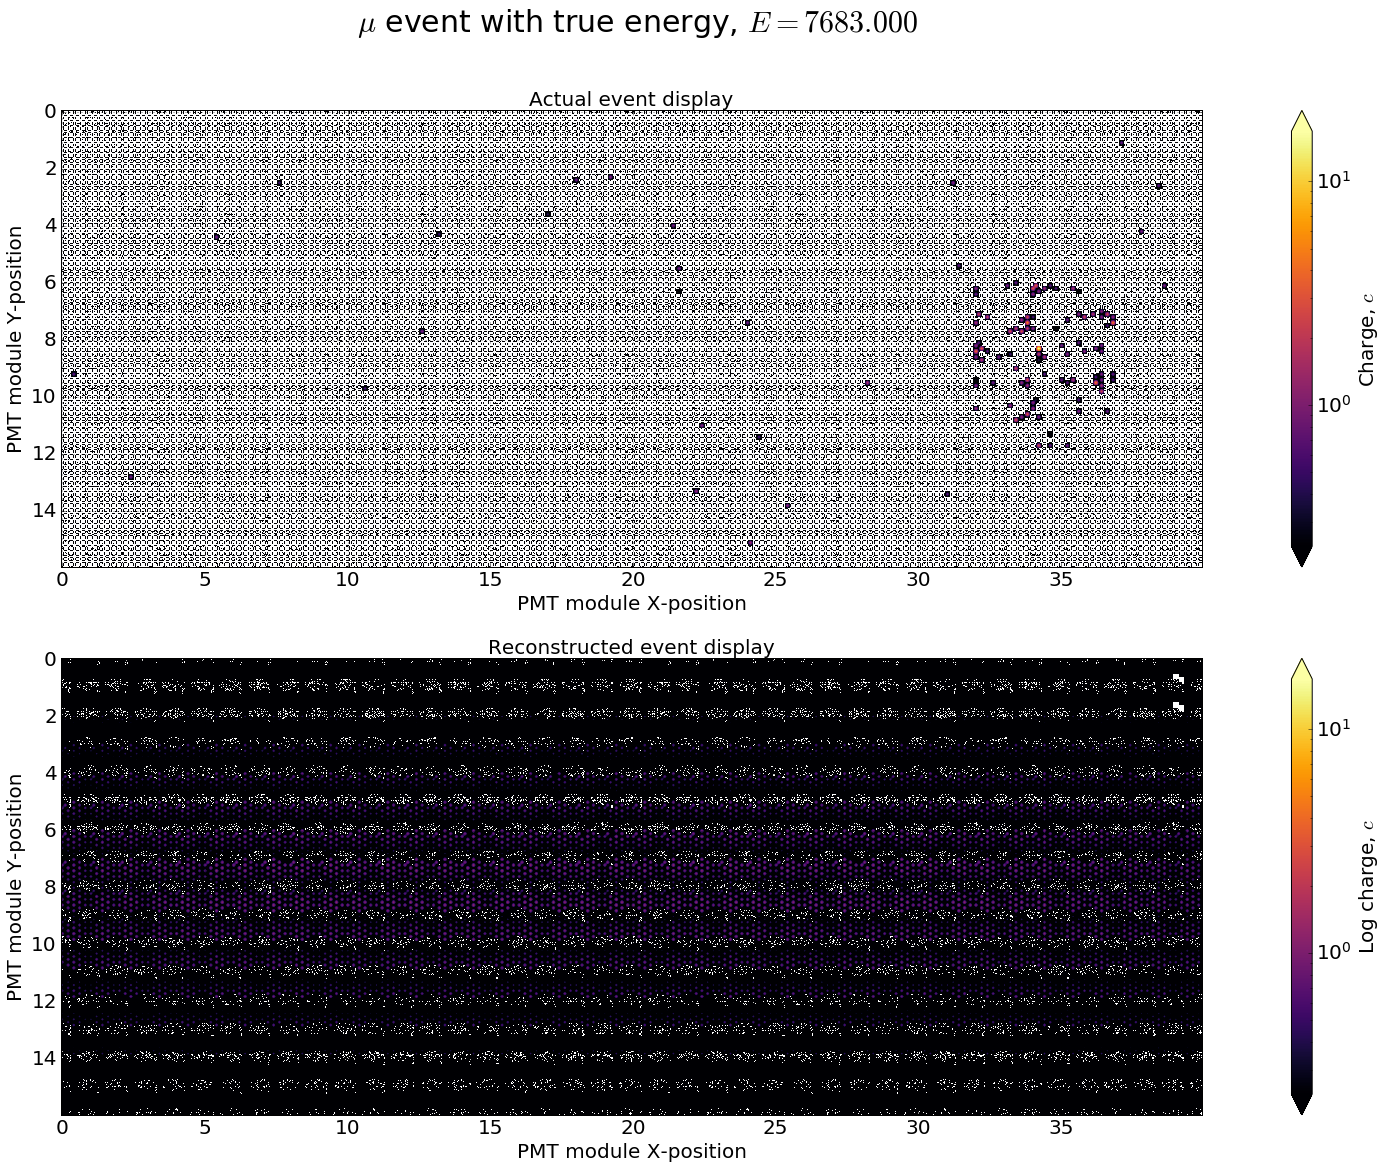

In [8]:
np_arr_path = dump_dir + "iteration_5999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

## Analyze the performance of the full convolutional classifier over the entire dataset

softmaxes shape :  (90000, 3)
labels shape :  (90000,)
predictions shape :  (90000,)
energies shape :  (90000,)


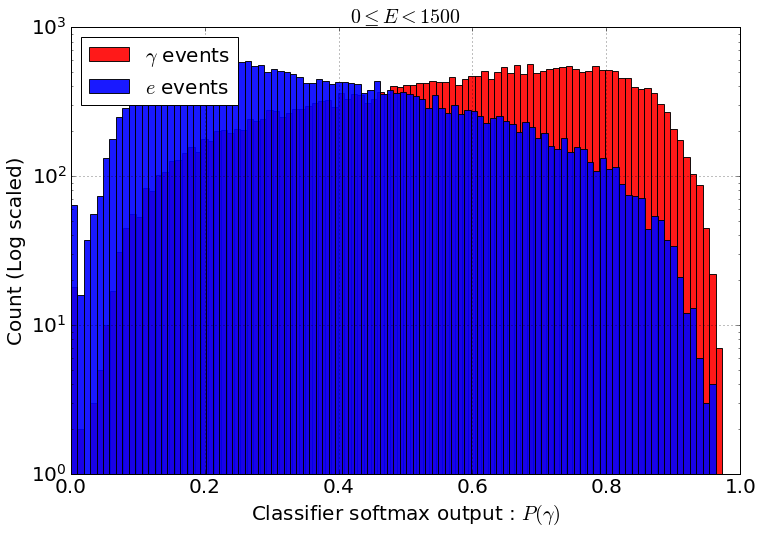

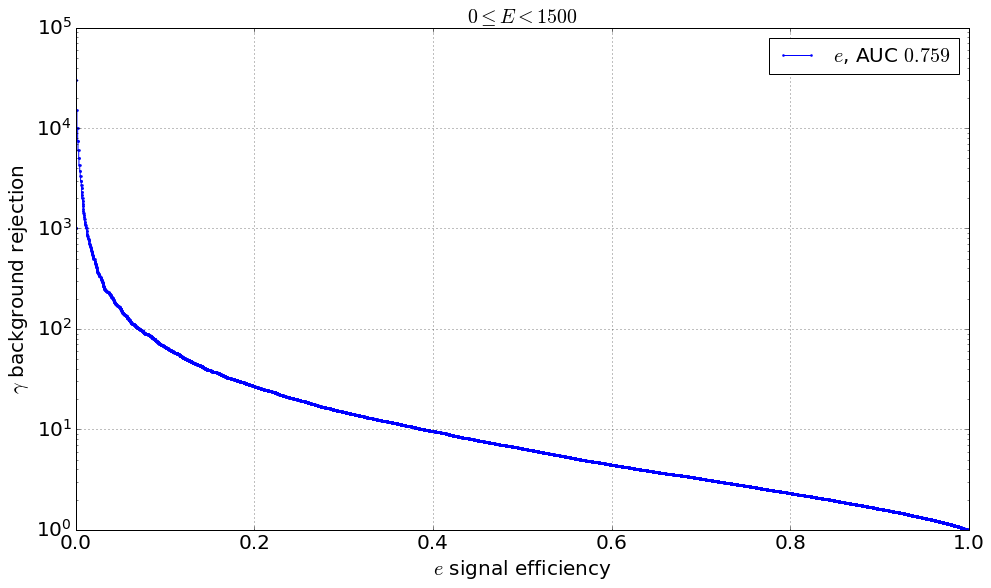

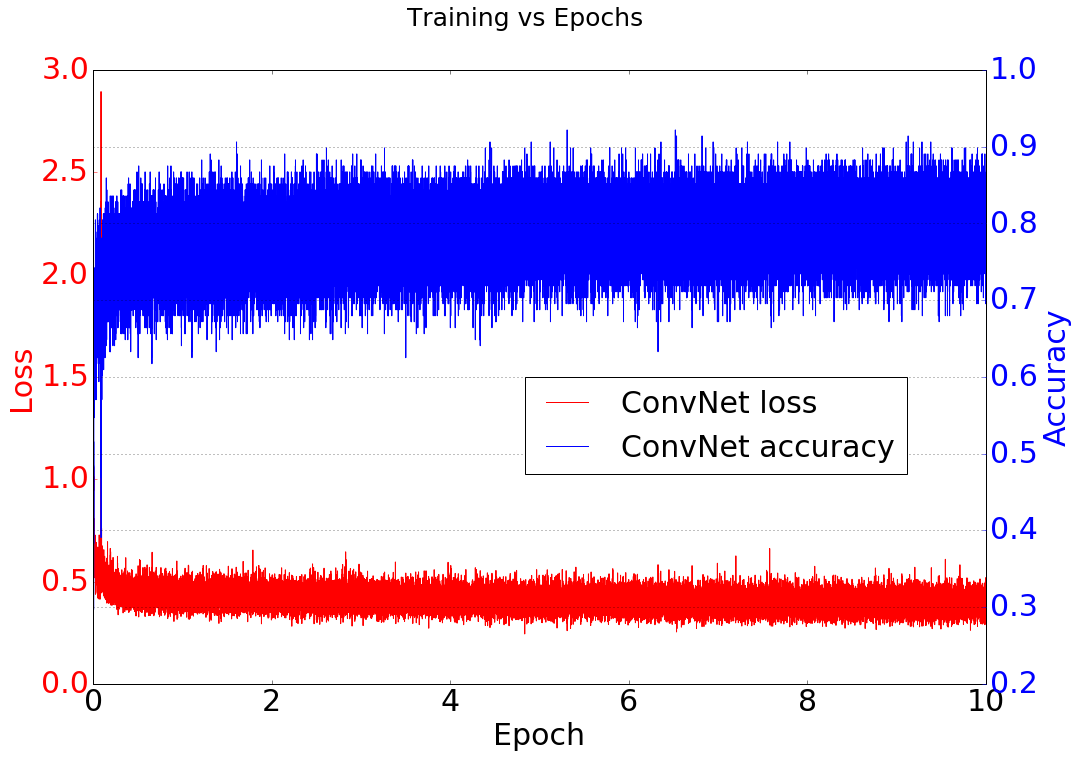

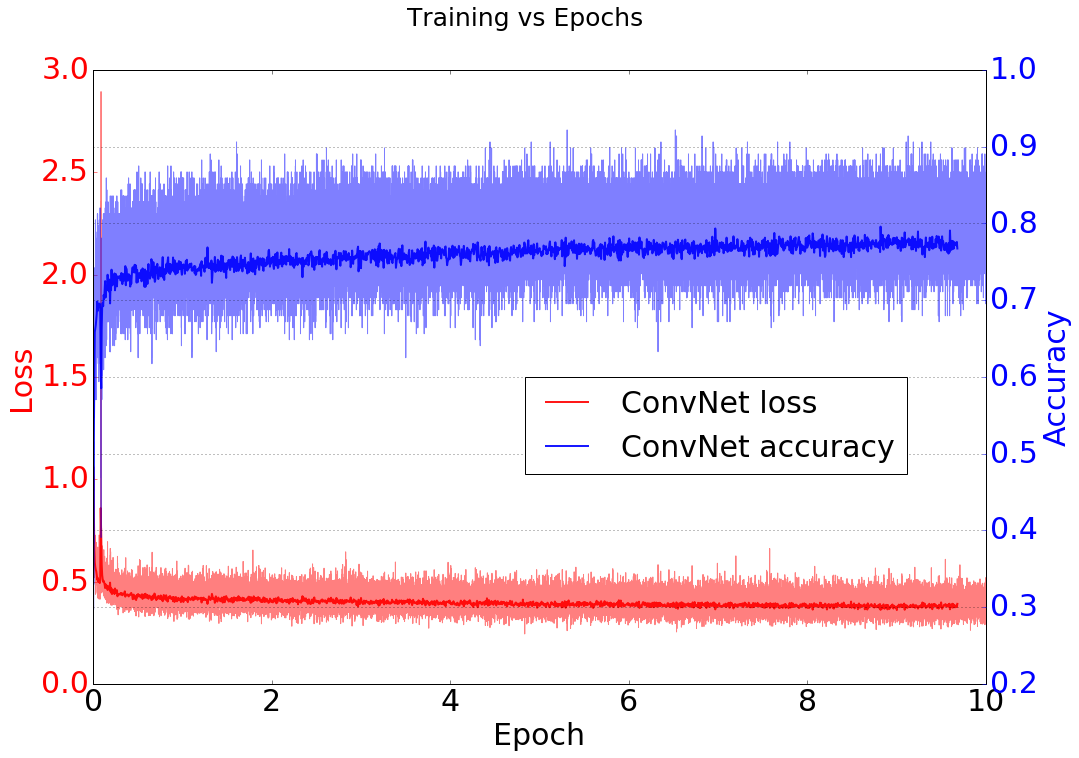

In [2]:
# Using the absolute path
run_id = "20190619_035743"
model_name = "ConvNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Load the numpy arrays into memory
softmaxes = np.load(dump_dir + "softmax.npy")
labels = np.load(dump_dir + "labels.npy")
predictions = np.load(dump_dir + "predictions.npy")
energies = np.load(dump_dir + "energies.npy")

# Check the shapes of the loaded arrays
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

# Plot the classifier response curve
plot_utils.plot_classifier_response(softmaxes, labels, energies, 
                                    softmax_index_dict={"gamma":0, "e":1},
                                    event_dict={"gamma":0}, show_plot=True)

# Plot the ROC curve for e vs gamma
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"gamma":0, "e":1},
                                     "e", "gamma", show_plot=True)

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot the training progress of the current model
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         show_plot=True)

# Plot using the downsample intervals
plot_utils.plot_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)

## Results from training and running the KvaeNet on 50000 samples for 10.0 epochs

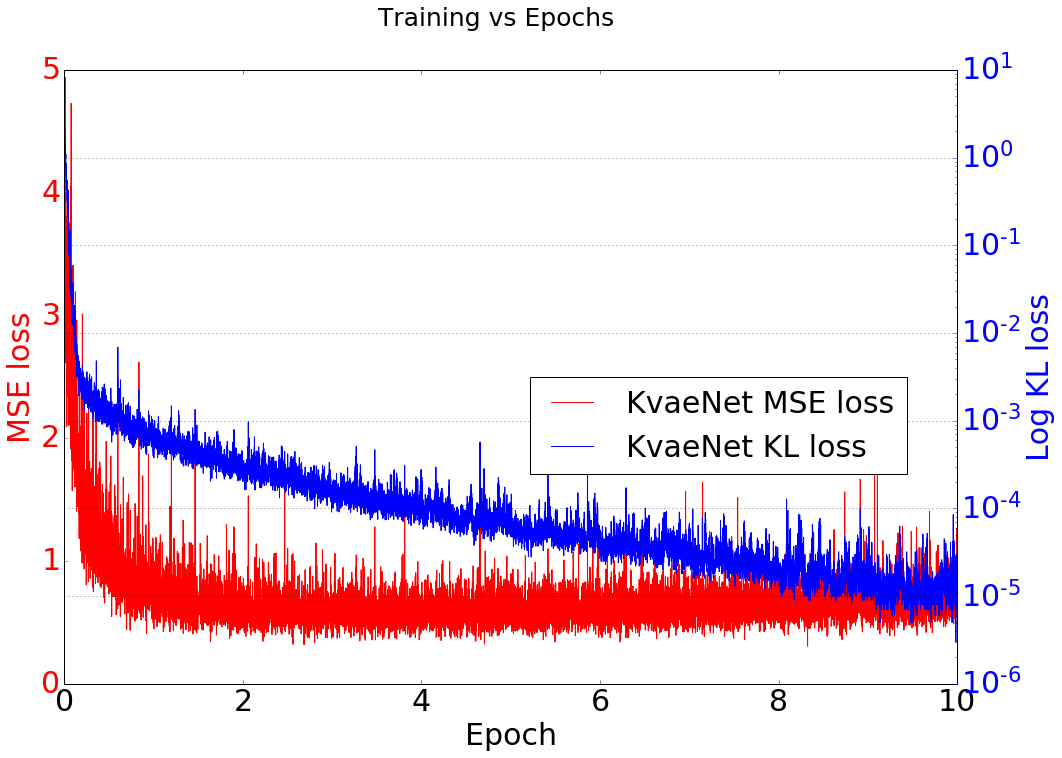

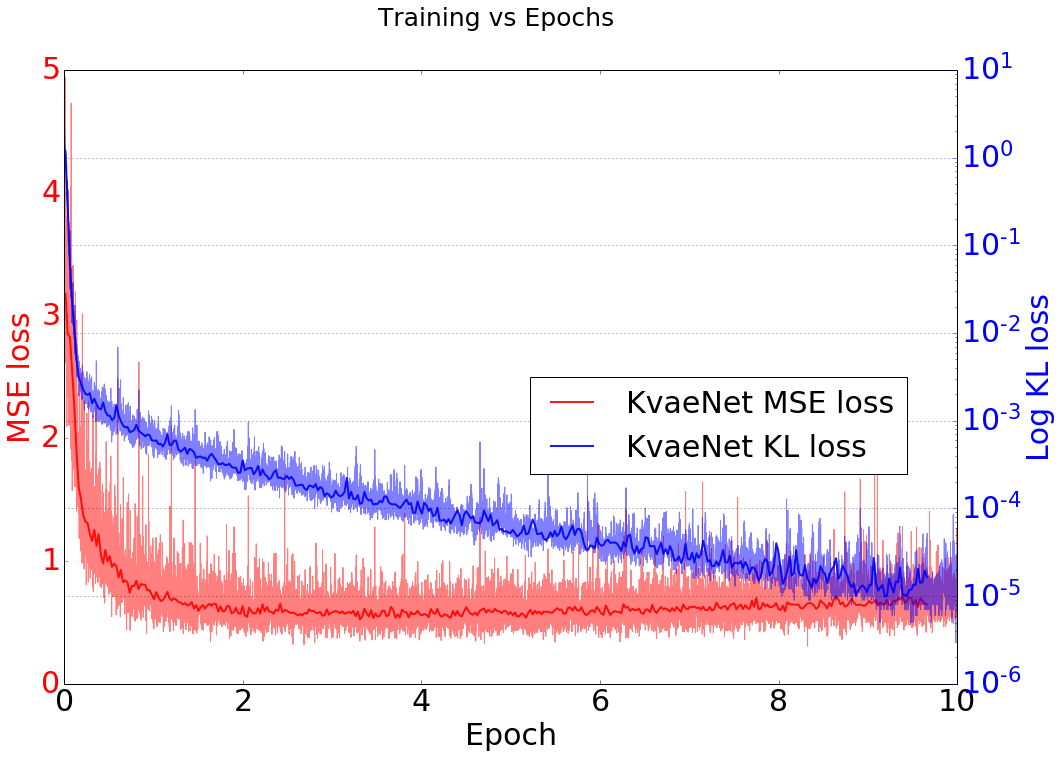

In [3]:
# Using the absolute path
run_id = "20190619_153043"
model_name = "KvaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot the training progress of the current model
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         show_plot=True)

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)

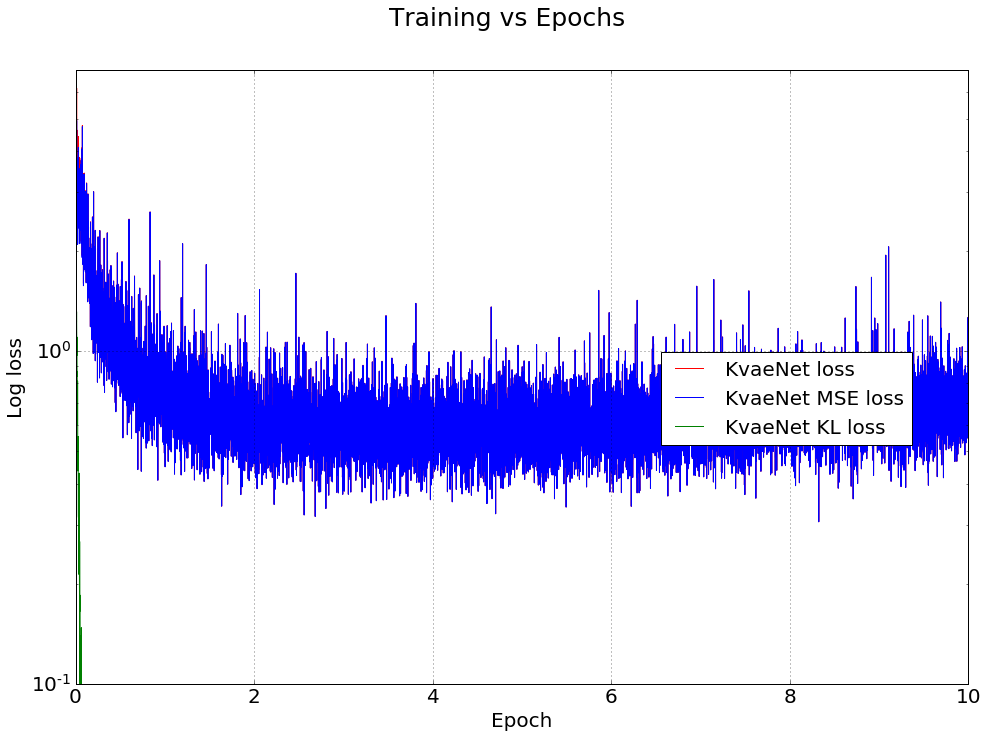

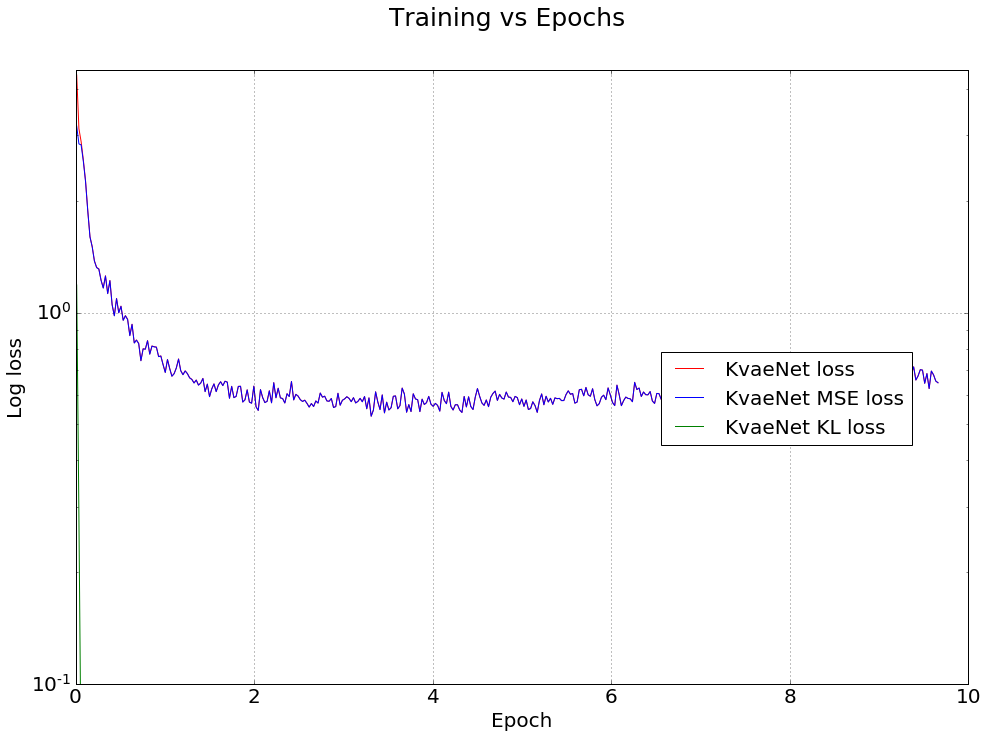

In [9]:
# Plot the training progress of the current model
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue", "green"]},
                         show_plot=True)

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue", "green"]},
                         downsample_interval=32, show_plot=True)

In [ ]:
## Plot the MSE and KL loss using the new plotting function
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         show_plot=True)

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         downsample_interval=32, show_plot=True)

In [ ]:
# Plot the training progress of the current model
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue", "green"]},
                         show_plot=True)

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue", "green"]},
                         downsample_interval=32, show_plot=True)

## Since the features of different loss values are indifferentiable, plotting them in the notebook separately

In [11]:
# Read in the dataframe containing all the loss values
log_df = pd.read_csv(training_log, usecols=["epoch", "loss", "mse_loss", "kl_loss"])

### Plot the MSE loss

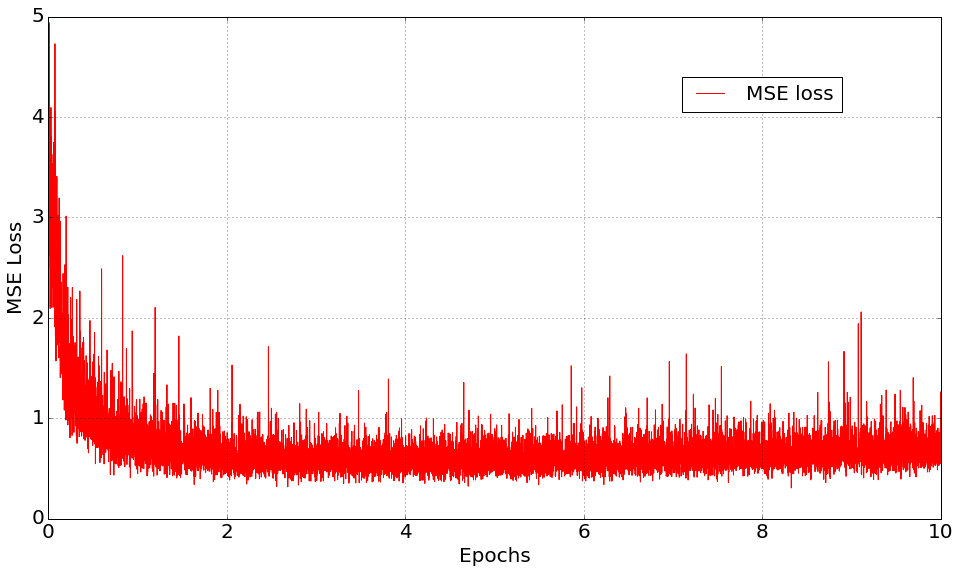

In [15]:
# Plot the values without any downsampling
epochs = log_df["epoch"].values
mse_loss = log_df["mse_loss"].values

fig = plt.figure(figsize=(16,9))
plt.plot(epochs, mse_loss, color="red", label="MSE loss")
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("MSE Loss", fontsize=20)
plt.tick_params(axis="both", labelsize=20)
plt.legend(prop={"size":20}, bbox_to_anchor=(0.9,0.9))

plt.grid(True)
plt.show()

### Plot the KL loss

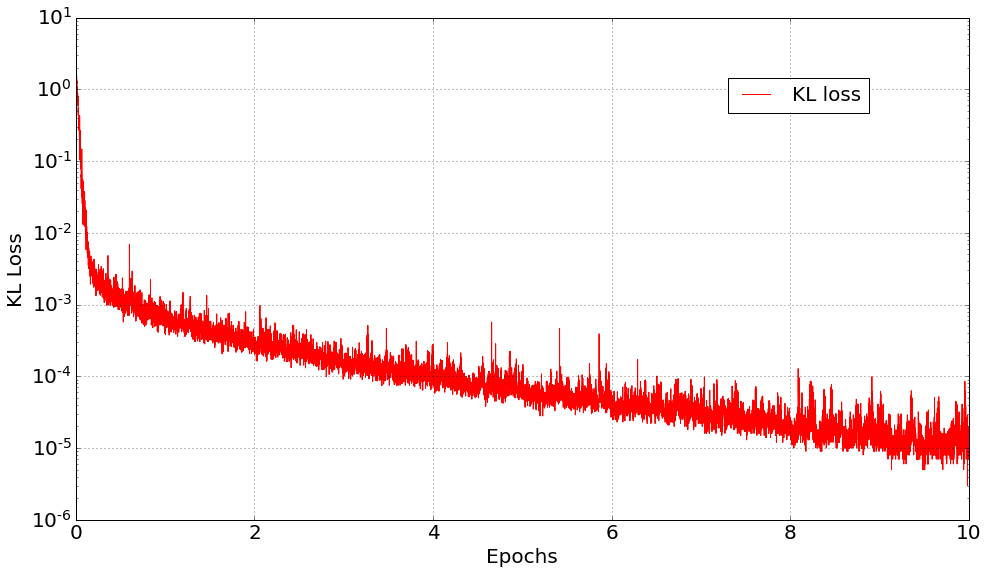

In [17]:
# Plot the values without any downsampling
epochs = log_df["epoch"].values
mse_loss = log_df["kl_loss"].values

fig = plt.figure(figsize=(16,9))
plt.plot(epochs, mse_loss, color="red", label="KL loss")
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("KL Loss", fontsize=20)
plt.tick_params(axis="both", labelsize=20)
plt.legend(prop={"size":20}, bbox_to_anchor=(0.9,0.9))
plt.yscale("log")

plt.grid(True)
plt.show()

## Display the latest reconstructed event

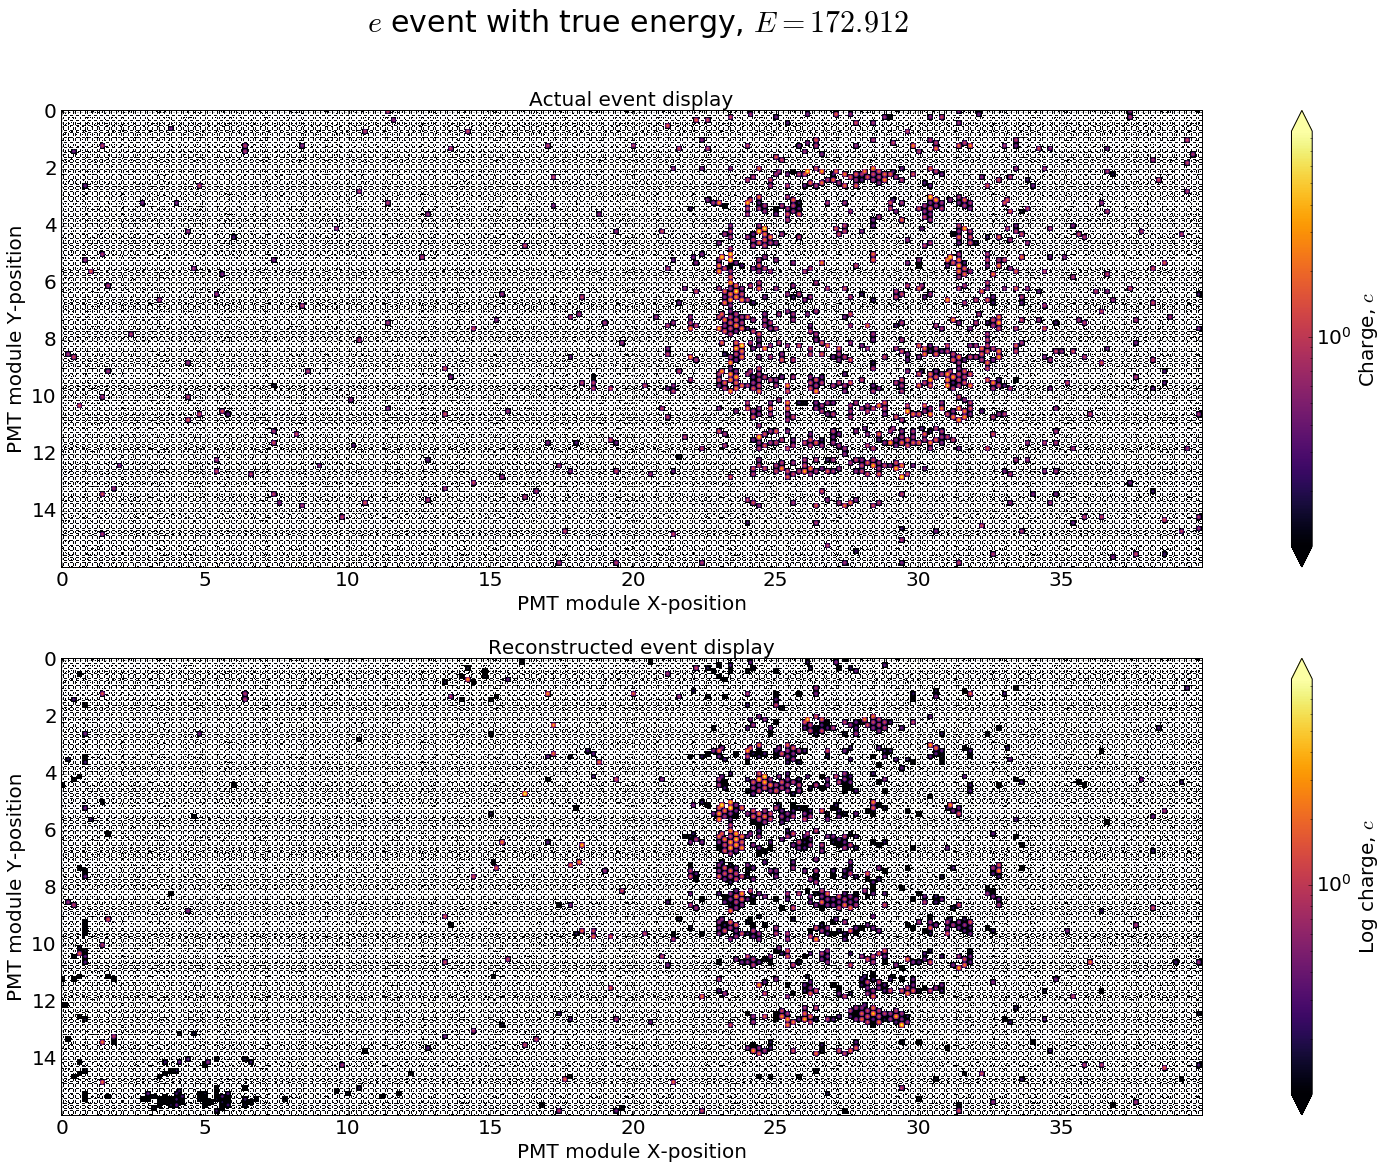

In [4]:
np_arr_path = dump_dir + "iteration_11999.npz"

# Load the numpy array
np_arr = np.load(np_arr_path)
np_event = np_arr["events"]
np_recon = np_arr["recons"]
np_labels = np_arr["labels"]
np_energies = np_arr["energies"]

i = random.randint(0, np_labels.shape[0]-1)
plot_utils.plot_actual_vs_recon(np_event[i], np_recon[i], 
                                label_dict[np_labels[i]], np_energies[i].item(),
                                show_plot=True)

## Nothing wrong with the training engine. The model architecture is damaged.

## Plot the model losses using the new plotting tools

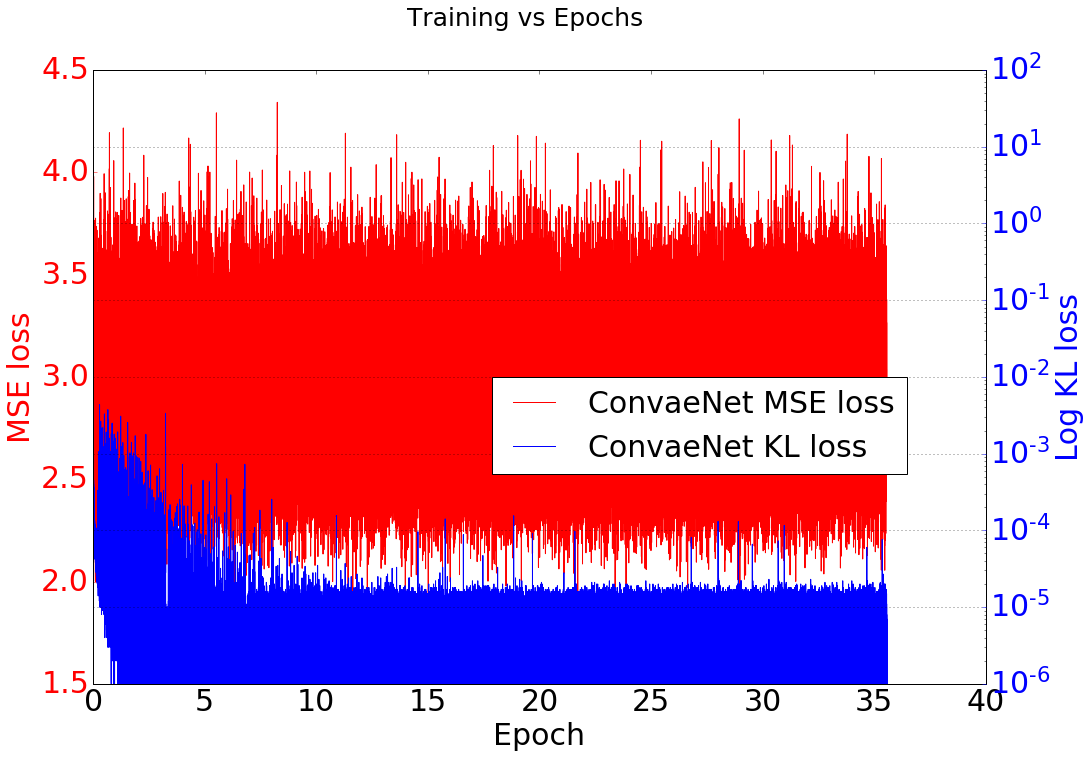

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 1152x792 with 2 Axes>

In [2]:
# Using the absolute path
run_id = "20190619_041500"
model_name = "ConvaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

# Plot the training progress of the current model
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                         show_plot=True, save_path=None)

# Plot using the downsample intervals
plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                             downsample_interval=32, show_plot=True,
                             save_path=None)

In [4]:
# Using the absolute path
run_id = "20190619_041500"
model_name = "ConvaeNet"
dump_dir = "/home/akajal/WatChMaL/VAE/dumps/" + run_id + "/"

# Setup the path to the training log file
training_log = dump_dir + "log_train.csv"

try:
    # Plot the training progress of the current model
    plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                             show_plot=False, save_path=None)

    # Plot using the downsample intervals
    plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                                 downsample_interval=32, show_plot=False,
                                 save_path=None)
except OverflowError:
    
    # Save the current backend and switch the backend
    tmp_backend = plt.get_backend()
    mpl.use("ps")
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    
    # Plot the training progress of the current model
    plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                             show_plot=False, save_path=None)

    # Plot using the downsample intervals
    plot_utils.plot_vae_training([training_log], [model_name], {model_name:["red", "blue"]},
                                 downsample_interval=32, show_plot=False,
                                 save_path=None)
    
    # Reset the backend
    mpl.use(tmp_backend)

In [5]:
# Manually read the values
log_df = pd.read_csv(training_log, usecols=["mse_loss", "kl_loss"])

In [7]:
# Extract the values from the dataframe
mse_loss_values = log_df["mse_loss"].values
kl_loss_values = log_df["kl_loss"].values

print("mse_loss size : {0}".format(mse_loss_values.shape))
print("kl loss size : {0}".format(kl_loss_values.shape))

mse_loss size : (393750,)
kl loss size : (393750,)


In [9]:
print(log_df["mse_loss"][:1000].values.shape)

(1000,)


In [8]:
# Print the range of values
print(np.amax(kl_loss_values))
print(np.amin(kl_loss_values))

11.582335
-2.5e-05
